<a href="https://colab.research.google.com/github/yifengjin89/yifengjin89-AI_assingment_3_Machine-Learning-in-Action/blob/main/Yifeng Jin Assignment3 Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I am interested in the stock market and have invested serveral thousand dollars in it. Tesla stock has been crazy in the stock market in recent years, and I have been paying attention to it. So I found Tesla stock dataset from 2010 - 2020 and decide to AI it up. I will use Linear Regression and Decision Tree Regression to predict future days' adjusted closing prices based off previous adjusted closing price.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
plt.style.use('bmh')

In [2]:
# load the data
from google.colab import files
uploaded = files.upload()

Saving TSLA.csv to TSLA (1).csv


This dataset included Date, Open, High, Low, Closing price, Adjusted Closing price, and Volume.

In [3]:
# store the data into a data frame
dataset = pd.read_csv('TSLA.csv')
dataset.head(15)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
5,2010-07-07,16.400000,16.629999,14.980000,15.800000,15.800000,6921700
6,2010-07-08,16.139999,17.520000,15.570000,17.459999,17.459999,7711400
7,2010-07-09,17.580000,17.900000,16.549999,17.400000,17.400000,4050600
8,2010-07-12,17.950001,18.070000,17.000000,17.049999,17.049999,2202500
9,2010-07-13,17.389999,18.639999,16.900000,18.139999,18.139999,2680100


Check and cleaning data

In [4]:
# check the data if has Na data
dataset.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
# display data info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [6]:
# display data 
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035003,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


Visualize the all Adjusted closing price data

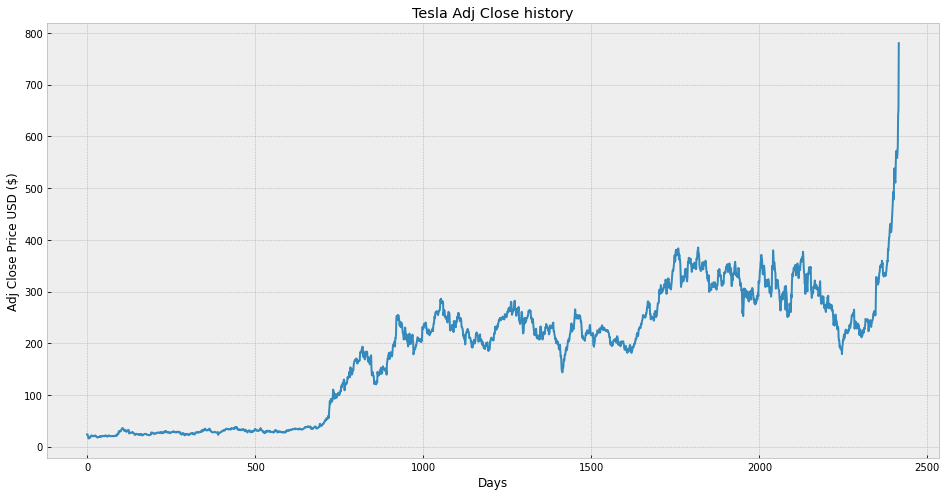

In [7]:
# visualize the adj closing price data
plt.figure(figsize=(16, 8))
plt.title('Tesla Adj Close history')
plt.xlabel('Days')
plt.ylabel('Adj Close Price USD ($)')
plt.plot(dataset['Adj Close'])
plt.show()

I am going to use Adjusted Closing price to predict the Adjusted Closing prices at 30 days out into the future

In [8]:
# get the Adj close price
df_adj = dataset[['Date', 'Adj Close']]
# df_adj = df_adj.set_index('Date')
print(df_adj.head())

         Date  Adj Close
0  2010-06-29  23.889999
1  2010-06-30  23.830000
2  2010-07-01  21.959999
3  2010-07-02  19.200001
4  2010-07-06  16.110001


In [9]:
# A variable for prediciting 30 days out into the future
forecast_days = 30

# create a new column shifted 30 days up
df_adj['Prediction'] = df_adj[['Adj Close']].shift(-forecast_days)
print(df_adj.tail(60))

            Date   Adj Close  Prediction
2356  2019-11-06  326.579987  404.040009
2357  2019-11-07  335.540009  405.589996
2358  2019-11-08  337.140015  419.220001
2359  2019-11-11  345.089996  425.250000
2360  2019-11-12  349.929993  430.940002
2361  2019-11-13  346.109985  430.380005
2362  2019-11-14  349.350006  414.700012
2363  2019-11-15  352.170013  418.329987
2364  2019-11-18  349.989990  430.260010
2365  2019-11-19  359.519989  443.010010
2366  2019-11-20  352.220001  451.540009
2367  2019-11-21  354.829987  469.059998
2368  2019-11-22  333.040009  492.140015
2369  2019-11-25  336.339996  481.339996
2370  2019-11-26  328.920013  478.149994
2371  2019-11-27  331.290009  524.859985
2372  2019-11-29  329.940002  537.919983
2373  2019-12-02  334.869995  518.500000
2374  2019-12-03  336.200012  513.489990
2375  2019-12-04  333.029999  510.500000
2376  2019-12-05  330.369995  547.200012
2377  2019-12-06  335.890015  569.559998
2378  2019-12-09  339.529999  572.200012
2379  2019-12-10

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [10]:
# create the independent data set (X) and convert it to a numpy array and remove last 60 rows
X = np.array(df_adj.drop(['Date','Prediction'], 1))[:-forecast_days - 30]
print(X)
print(len(X))

[[ 23.889999]
 [ 23.83    ]
 [ 21.959999]
 ...
 [313.309998]
 [317.470001]
 [317.220001]]
2356


In [11]:
# create the target data set (y) and convert it to a numpy array and remove last 60 rows
y = np.array(df_adj['Prediction'])[:-forecast_days - 30]
print(y)
print(len(y))

[ 17.9       17.6       18.32     ... 381.5      378.98999  393.149994]
2356


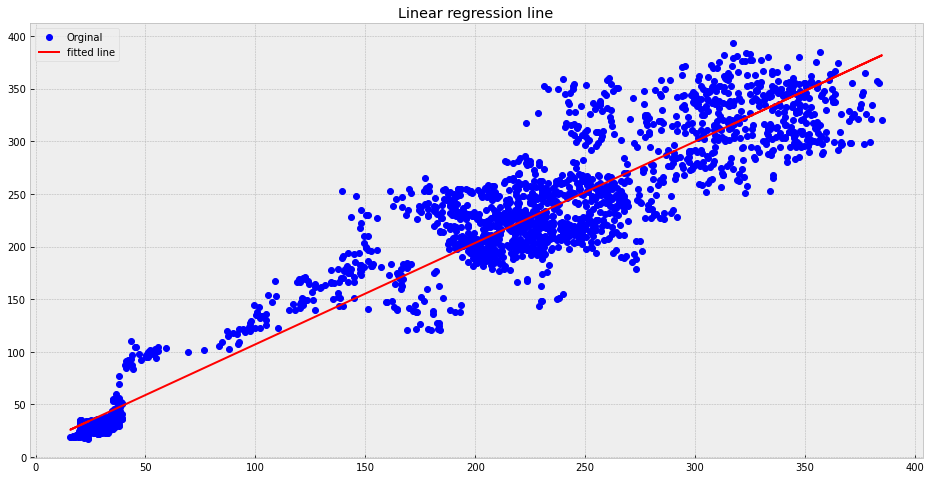

In [12]:
plt.figure(figsize=(16, 8))
plt.plot(X.flatten(), y, 'o', color='blue', label='Orginal')
m, b = np.polyfit(X.flatten(), y, 1)
plt.plot(X, m*X + b, 'r', color='red', label='fitted line')
plt.legend()
plt.title('Linear regression line')
plt.show()

In [13]:
# split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [14]:
# create and train the Linear Regression Model
lr = LinearRegression().fit(x_train, y_train)
# testing model: score returns the cofficient of determination R square of the prediction, best score is 1.0
lr_r_squre = lr.score(x_test, y_test)
print('The R square for linear regression is: ', lr_r_squre)

The R square for linear regression is:  0.9218587895614956


In [15]:
# create and train the DecisionTreeRegressor
tree = DecisionTreeRegressor().fit(x_train, y_train)
# testing model: score returns the cofficient of determination R square of the prediction, best score is 1.0
tree_r_square = tree.score(x_test, y_test)
print('The R square for decision tree is: ', tree_r_square)

The R square for decision tree is:  0.8942721536377144


It looks like the Linear Regression model is better than the Decision Tree Regression model. I am gonna use the last 60 rows ~ 30 rows data from Adj close column to predict their next 30 days' adjusted closing prices first because it has actual value date that can be compared. After that, I will choose the better model to predict next 30 days' Adjust close prices for the last 30 rows.

In [16]:
# set x_forecast equal to the last 60 to 30 rows from Adj close column
x_forecast =  df_adj.drop(['Date', 'Prediction'], 1)[:-forecast_days]
x_forecast = np.array(x_forecast.tail(forecast_days))
print(x_forecast)

[[326.579987]
 [335.540009]
 [337.140015]
 [345.089996]
 [349.929993]
 [346.109985]
 [349.350006]
 [352.170013]
 [349.98999 ]
 [359.519989]
 [352.220001]
 [354.829987]
 [333.040009]
 [336.339996]
 [328.920013]
 [331.290009]
 [329.940002]
 [334.869995]
 [336.200012]
 [333.029999]
 [330.369995]
 [335.890015]
 [339.529999]
 [348.839996]
 [352.700012]
 [359.679993]
 [358.390015]
 [381.5     ]
 [378.98999 ]
 [393.149994]]


In [17]:
# print linear regression model prediction for the next 30 days
lr_prediction = lr.predict(x_forecast) 
print(lr_prediction)

[326.10174832 334.77360844 336.3221569  344.01645979 348.7007984
 345.00364508 348.13946427 350.86877746 348.75886584 357.98237202
 350.91715781 353.44320445 332.35401056 335.54786719 328.36651711
 330.66029203 329.3537024  334.12514266 335.41238519 332.34432249
 329.76986646 335.11235795 338.63527699 347.64585662 351.38173125
 358.13723016 356.88873894 379.2554873  376.82620134 390.53080765]


In [18]:
# print DecisionTreeRegressor model prediction for the next 30 days
tree_prediction = tree.predict(x_forecast) 
print(tree_prediction)

[285.480011  267.529999  303.700012  305.200012  355.48999   294.790009
 321.350006  289.660004  333.350006  319.3850095 289.660004  311.299988
 379.570007  333.299988  337.640015  343.75      355.899994  366.600006
 350.98999   379.570007  355.899994  350.98999   323.7599945 310.119995
 355.329987  302.26001   290.170013  334.459991  299.019989  355.170013 ]


            Date   Adj Close  Prediction  Predictions
2356  2019-11-06  326.579987  404.040009   285.480011
2357  2019-11-07  335.540009  405.589996   267.529999
2358  2019-11-08  337.140015  419.220001   303.700012
2359  2019-11-11  345.089996  425.250000   305.200012
2360  2019-11-12  349.929993  430.940002   355.489990
2361  2019-11-13  346.109985  430.380005   294.790009
2362  2019-11-14  349.350006  414.700012   321.350006
2363  2019-11-15  352.170013  418.329987   289.660004
2364  2019-11-18  349.989990  430.260010   333.350006
2365  2019-11-19  359.519989  443.010010   319.385010
2366  2019-11-20  352.220001  451.540009   289.660004
2367  2019-11-21  354.829987  469.059998   311.299988
2368  2019-11-22  333.040009  492.140015   379.570007
2369  2019-11-25  336.339996  481.339996   333.299988
2370  2019-11-26  328.920013  478.149994   337.640015
2371  2019-11-27  331.290009  524.859985   343.750000
2372  2019-11-29  329.940002  537.919983   355.899994
2373  2019-12-02  334.869995

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


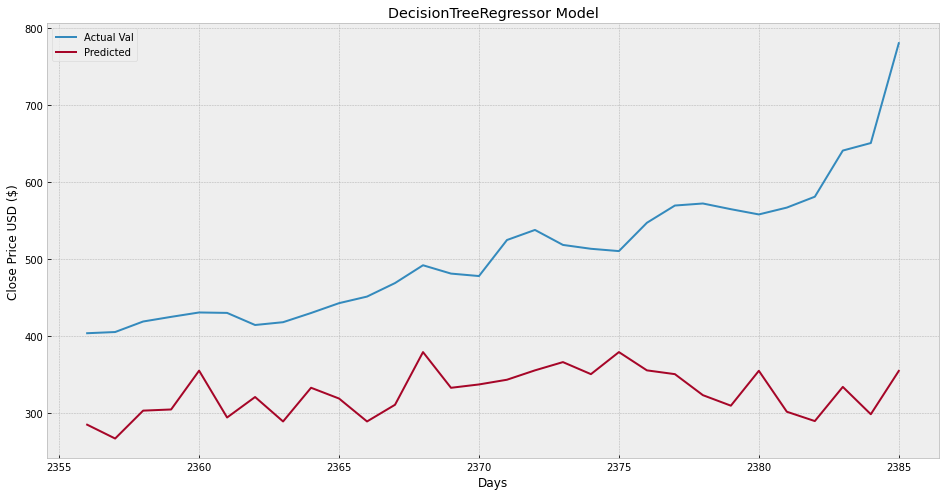

In [19]:
# visualize the data of tree prediction
predictions = tree_prediction

valid = df_adj[X.shape[0]:-forecast_days]
valid['Predictions'] = predictions
print(valid)
plt.figure(figsize=(16, 8))
plt.title('DecisionTreeRegressor Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(valid[['Prediction', 'Predictions']])
# plt.legend(['Original', 'Actual Val', 'Predicted'])
plt.legend(['Actual Val', 'Predicted'])
plt.show()

In [20]:
# calculate the RMSE for decision tree
tree_rmse = mean_squared_error(valid['Prediction'] , valid['Predictions'], squared=False)
print("The RMSE(Root mean squared error) for decistion tree is ", tree_rmse)

The RMSE(Root mean squared error) for decistion tree is  198.11193867945215


            Date   Adj Close  Prediction  Predictions
2356  2019-11-06  326.579987  404.040009   326.101748
2357  2019-11-07  335.540009  405.589996   334.773608
2358  2019-11-08  337.140015  419.220001   336.322157
2359  2019-11-11  345.089996  425.250000   344.016460
2360  2019-11-12  349.929993  430.940002   348.700798
2361  2019-11-13  346.109985  430.380005   345.003645
2362  2019-11-14  349.350006  414.700012   348.139464
2363  2019-11-15  352.170013  418.329987   350.868777
2364  2019-11-18  349.989990  430.260010   348.758866
2365  2019-11-19  359.519989  443.010010   357.982372
2366  2019-11-20  352.220001  451.540009   350.917158
2367  2019-11-21  354.829987  469.059998   353.443204
2368  2019-11-22  333.040009  492.140015   332.354011
2369  2019-11-25  336.339996  481.339996   335.547867
2370  2019-11-26  328.920013  478.149994   328.366517
2371  2019-11-27  331.290009  524.859985   330.660292
2372  2019-11-29  329.940002  537.919983   329.353702
2373  2019-12-02  334.869995

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


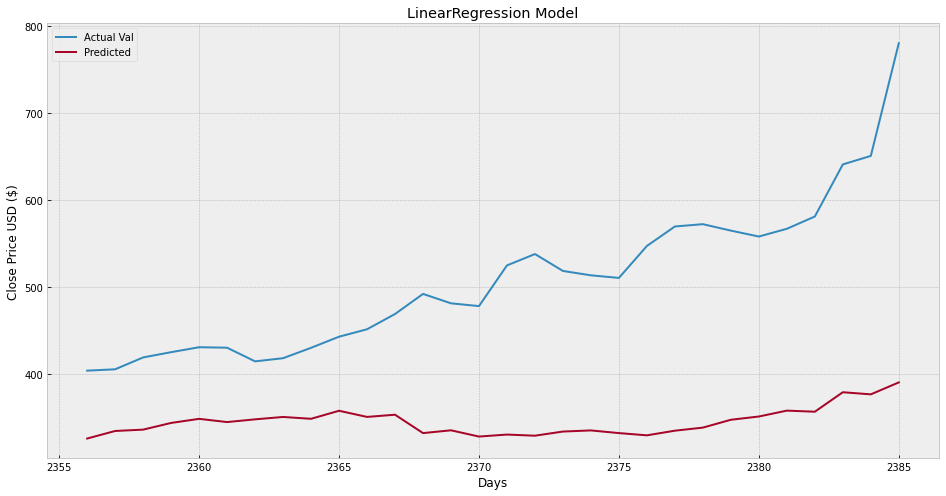

In [21]:
# visualize the data of Linear prediction
predictions = lr_prediction
valid = df_adj[X.shape[0]:-forecast_days]
valid['Predictions'] = predictions
print(valid)
valid['Predictions'] = predictions
plt.figure(figsize=(16, 8))
plt.title('LinearRegression Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(valid[['Prediction', 'Predictions']])
plt.legend(['Actual Val', 'Predicted'])
plt.show()

In [22]:
# calculate the RMSE for linear regression 
lr_rmse = mean_squared_error(valid['Prediction'] , valid['Predictions'], squared=False)
print("The RMSE(Root mean squared error) for linear regression is ", lr_rmse)

The RMSE(Root mean squared error) for linear regression is  179.6601354132902


Based on the two metrics:
1. R sqaure: lr_r_square(0.92) > tree_r_square(0.89)
2. RMSE: lr_rmse(179.66) < tree_rmse(198.11)
The linear regression model has better performance. So I will use the linear regression to predict next 30 days' Adjust closing price.

In [23]:
# set x_forecast equal to the last 30 rows of the original dataset from Adj close column
x_forecast = df_adj.drop(['Date', 'Prediction'], 1)[-forecast_days:]
x_forecast = np.array(x_forecast.tail(forecast_days))
print(x_forecast)

[[404.040009]
 [405.589996]
 [419.220001]
 [425.25    ]
 [430.940002]
 [430.380005]
 [414.700012]
 [418.329987]
 [430.26001 ]
 [443.01001 ]
 [451.540009]
 [469.059998]
 [492.140015]
 [481.339996]
 [478.149994]
 [524.859985]
 [537.919983]
 [518.5     ]
 [513.48999 ]
 [510.5     ]
 [547.200012]
 [569.559998]
 [572.200012]
 [564.820007]
 [558.02002 ]
 [566.900024]
 [580.98999 ]
 [640.809998]
 [650.570007]
 [780.      ]]


In [24]:
# print linear regression model prediction for the next 30 days
lr_prediction = lr.predict(x_forecast) 
print(lr_prediction)

[401.07059056 402.57072867 415.76238119 421.59845033 427.10545706
 426.56347003 411.38775886 414.90099079 426.44733417 438.7872834
 447.04295042 463.99948177 486.33722592 475.88454466 472.79713582
 518.00489404 530.64487147 511.84945153 507.00056769 504.10673829
 539.62644689 561.26731685 563.82242577 556.67976797 550.09847429
 558.69288986 572.32971065 630.22585664 639.67197551 764.93939057]


The results looks like not bad, but it still has bias. Using one factor to forecast stock prices is not enough. In reality, there are a lot of factors affect stock price. In the further study, we should include more related features in the models to improve their forecasting performance. 